# 1. Imports

In [35]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from copy import deepcopy

In [36]:
from tensorflow.keras.models import load_model

In [37]:
# Load properties from another python file
from properties import *

In [38]:
from random import random, randint

# 2. Load models

In [39]:
models = []
for i in range(5):
    models.append([])
    for j in range(9):
        models[i].append(load_model("ACAS_XU_tf_keras/ACASXU_{}_{}.h5".format(i+1, j+1)))

In [40]:
for i in range(5):
    for j in range(9):
        models[i][j].compile()

In [41]:
def random_pts(n, prop_dom, main_dom):
    """ prop_dom is a list of domains given by intervals in a numpy 2x5 table. """
    ndom = len(prop_dom)
    ndim = main_dom.shape[1]
    
    x = np.zeros((n,ndim))
    for i in range(n): # generate the i-th point
        choosen_dom = prop_dom[randint(0,ndom-1)] # choose the input property domain for a given prop
        for k in range(ndim): # create a random coord for each dim
            boundaries = main_dom[:,k]
            if choosen_dom[0,k] != None:
                boundaries[0] = choosen_dom[0,k]
            if choosen_dom[1,k] != None:
                boundaries[1] = choosen_dom[1,k]
            x[i,k] = boundaries[0] + random()*(boundaries[1]-boundaries[0])

    return(x)

In [42]:
def normalize(x, x_mean, x_range):
    (n,k) = x.shape
    nx = np.zeros((n,k))
    for i in range(n):
        for j in range(k):
            nx[i,j] = (x[i,j]-x_mean[j])/x_range[j]
    return(nx)

In [43]:
rand_inputs = random_pts(10, IP2_dom, X_dom)

# 3. Statistics on random points

In [44]:
def clustering_attempt(N, dim1, dim2, model_arg1, model_arg2, show=True, save=True, dir="D:/CentraleSupélec/Projet attaques adverses/adversarial-attack/images_clustering/"):
    """
    Analyse la sortie par le réseau model de N entrées générées aléatoirement, dont seules les composantes dim1 et dim2 \n
    varient (les trois autres composantes sont fixées égales à une valeur moyenne). 
    Sauvegarde la figure obtenue, et l'affiche si show vaut True.
    Complexité temporelle : compter 4 secondes pour N=50000, 50 secondes pour N=500000.
    """
    model = models[model_arg1-1][model_arg2-1]
    rand_inputs = random_pts(N, [X_dom], X_dom)
    fixed_dims = np.array([0, 1, 2, 3, 4])
    fixed_dims1 = deepcopy(fixed_dims[fixed_dims != dim1])
    fixed_dims2 = deepcopy(fixed_dims1[fixed_dims1 != dim2]) #Contains 3 indexes whose values will be fixed (to the average value)
    mean_inputs = [np.mean(rand_inputs[:, i]) for i in range(5)]

    rand_inputs[:, fixed_dims2[0]] = mean_inputs[fixed_dims2[0]]*np.ones(N)
    rand_inputs[:, fixed_dims2[1]] = mean_inputs[fixed_dims2[1]]*np.ones(N)
    rand_inputs[:, fixed_dims2[2]] = mean_inputs[fixed_dims2[2]]*np.ones(N)


    rand_outputs = model.predict(normalize(rand_inputs, X_mean, X_range))
    preds = np.argmin(rand_outputs, 1)

    alabels = [r'$\rho$', "$\Theta$", r'$\varphi$', "$v_{own}$", "$v_{int}$"]
    textlabels = ["rho", "theta", "psi", "v_own", "v_int"]

    def clustering(d1, d2):
        plt.clf()
        plt.scatter(rand_inputs[preds==0, d1], rand_inputs[preds==0, d2], label="COC", color="lightcoral")
        plt.scatter(rand_inputs[preds==1, d1], rand_inputs[preds==1, d2], label="WR",  color="cornflowerblue")
        plt.scatter(rand_inputs[preds==3, d1], rand_inputs[preds==3, d2], label="SR",  color="mediumblue")
        plt.scatter(rand_inputs[preds==2, d1], rand_inputs[preds==2, d2], label="WL",  color="springgreen")
        plt.scatter(rand_inputs[preds==4, d1], rand_inputs[preds==4, d2], label="SL",  color="forestgreen")
        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.xlabel(alabels[dim1], fontsize = 15)
        plt.ylabel(alabels[dim2], fontsize = 15)
        plt.title("ACASXU_{}_{}".format(model_arg1, model_arg2) + ", variable components: " + alabels[d1] + ", " + alabels[d2])
        if save:
            plt.savefig(dir + textlabels[d1] + "-" + textlabels[d2] + "-ACASXU_{}_{}.png".format(model_arg1, model_arg2), bbox_inches='tight')
        if show:
            plt.show()
        
    clustering(dim1, dim2)

30.200000000000003 % (136/450)
30.400000000000002 % (137/450)
30.6 % (138/450)
30.8 % (139/450)
31.1 % (140/450)
31.3 % (141/450)
31.5 % (142/450)
31.700000000000003 % (143/450)
32.0 % (144/450)
32.2 % (145/450)
32.4 % (146/450)
32.6 % (147/450)
32.800000000000004 % (148/450)
33.1 % (149/450)
33.300000000000004 % (150/450)
33.5 % (151/450)
33.7 % (152/450)
34.0 % (153/450)
34.2 % (154/450)
34.4 % (155/450)
34.6 % (156/450)
34.800000000000004 % (157/450)
35.1 % (158/450)
35.300000000000004 % (159/450)
35.5 % (160/450)
35.7 % (161/450)
36.0 % (162/450)
36.2 % (163/450)
36.4 % (164/450)
36.6 % (165/450)
36.800000000000004 % (166/450)
37.1 % (167/450)
37.300000000000004 % (168/450)
37.5 % (169/450)
37.7 % (170/450)
38.0 % (171/450)
38.2 % (172/450)
38.400000000000006 % (173/450)
38.6 % (174/450)
38.800000000000004 % (175/450)
39.1 % (176/450)
39.300000000000004 % (177/450)
39.5 % (178/450)
39.7 % (179/450)
40.0 % (180/450)
40.2 % (181/450)
40.400000000000006 % (182/450)
40.6 % (183/450)
40

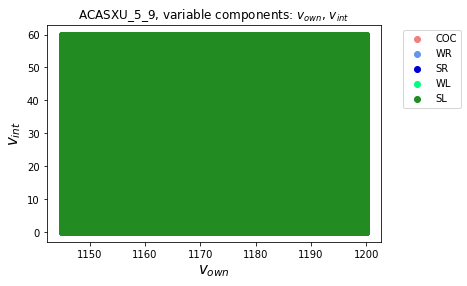

In [96]:
# ATTENTION - cette cellule met plusieurs heures à s'exécuter. Elle génère les 405 images.
cpt = 135
for dim1 in range(0, 5):
    for dim2 in range(0,5):
        if dim1< dim2 and dim1 != 1:
            for i in range(1, 6):
                for j in range(1, 10):
                    clustering_attempt(500000, dim1, dim2, i, j, False)
                    cpt += 1
                    print("{} % ({}/450)".format(0.1*int(10*cpt*100/450), cpt))

In [45]:
max_values = [np.max(rand_outputs[:, i]) for i in range(5)]
min_values = [np.min(rand_outputs[:, i]) for i in range(5)]
mean_values = [np.mean(rand_outputs[:, i]) for i in range(5)]
p5 = [np.percentile(rand_outputs[:, i], 5) for i in range(5)]
p95 = [np.percentile(rand_outputs[:, i], 95) for i in range(5)]
print("Maxima: ", max_values)
print("Minima: ", min_values)
print("Mean values: ", mean_values)
print("5th percentile: ", p5)
print("95th percentile", p95)

NameError: name 'rand_outputs' is not defined